# ElasticNet Regression

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


Rozważmy następujący zbiór punktów:

In [30]:
true_fun = lambda X: np.cos(1.5 * np.pi * X)
n_samples=20
x = np.sort(np.random.rand(n_samples))
y = true_fun(x) + np.random.randn(n_samples) * 0.1
x=np.vstack(x)

# Przykład
Proszę wykonać regresję (Ridge Regression) na powyższym zbiorze danych 

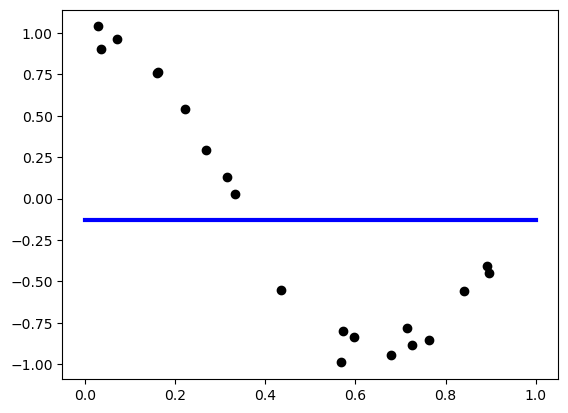

In [31]:
clf = Lasso(alpha=1.0)
clf.fit(x, y) 

x_plot = np.vstack(np.linspace(0, 1, 20))
plt.plot(x_plot, clf.predict(x_plot), color='blue',linewidth=3)
plt.plot(x, y, 'ok')
plt.show()

## Regresja liniowa

LR degree 2
LR degree 20


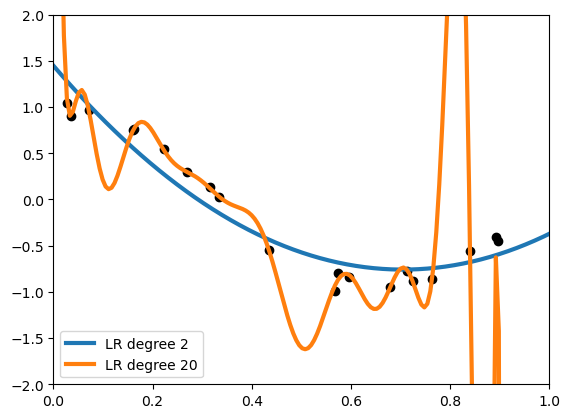

In [32]:
# prepare models
models = []
predicts = []
names=[]
models.append(('LR degree 2', make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression()) ))
models.append(('LR degree 20', make_pipeline(PolynomialFeatures(20), linear_model.LinearRegression()) ))

x_plot = np.vstack(np.linspace(-3, 3, 1000))
for name, model in models:
    print(name)
    model.fit(x, y)
    predicts.append(model.predict(x_plot))
    names.append(name)
    
plt.plot(x, y, 'ok');
for i in range(len(models)):
    #print(i)
    plt.plot(x_plot, predicts[i],linewidth=3,label=names[i])
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
plt.legend()    
plt.show()    

# Zadanie 1
Proszę wykonać 
* regresję dla wielomianów o stopniu **20**
* regresję (ElasticNet Regression) dla wielomianów o stopniu **20** oraz
   * alpha = 1 
   * alpha = 10 000 
   * alpha = 0.0001

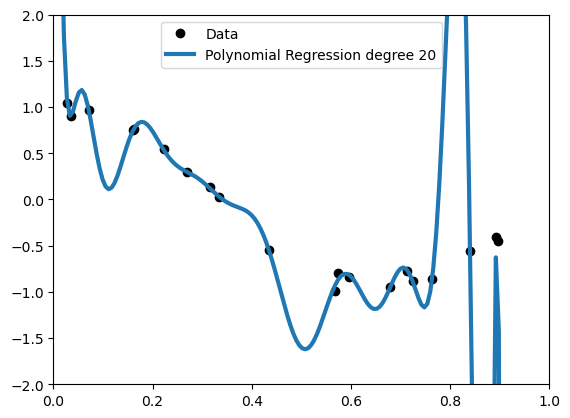

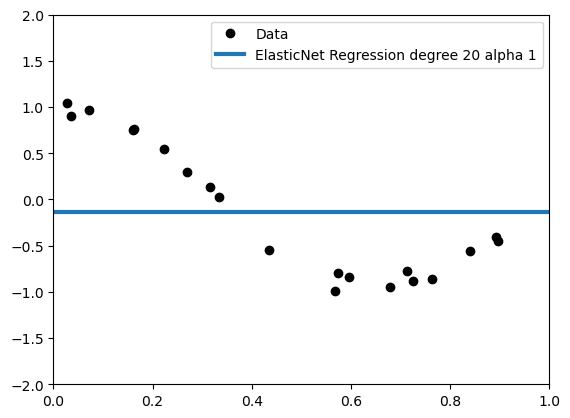

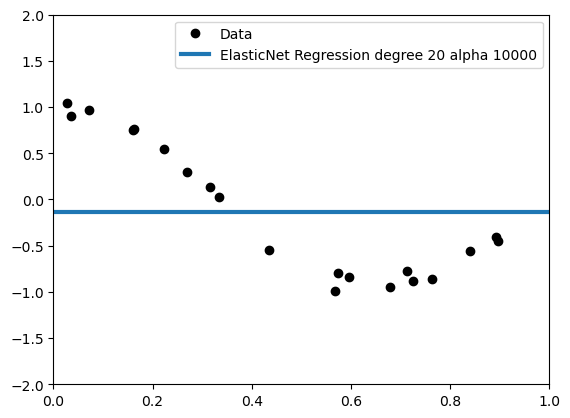

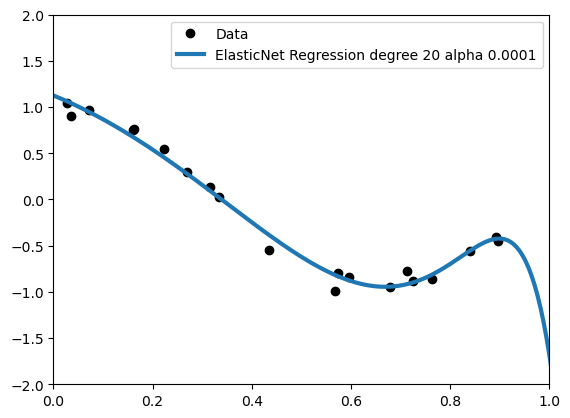

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import numpy as np
import matplotlib.pyplot as plt

# Function to plot the data and the predictions
def plot_data(x, y, x_plot, y_pred, title):
    plt.plot(x, y, 'ok', label="Data")
    plt.plot(x_plot, y_pred, linewidth=3, label=title)
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend()
    plt.show()

# Generate x_plot for the predictions (assuming x_plot is defined)
x_plot = np.vstack(np.linspace(-3, 3, 1000))

# Execution for Polynomial Regression of degree 20
poly_model = make_pipeline(PolynomialFeatures(degree=20), linear_model.LinearRegression())
poly_model.fit(x, y)
poly_predict = poly_model.predict(x_plot)
plot_data(x, y, x_plot, poly_predict, "Polynomial Regression degree 20")

# Execution for ElasticNet Regression of degree 20 with different alpha values
alphas = [1, 10000, 0.0001]
for alpha in alphas:
    elasticnet_model = make_pipeline(PolynomialFeatures(degree=20), ElasticNet(max_iter=10000000, alpha=alpha))
    elasticnet_model.fit(x, y)
    elasticnet_predict = elasticnet_model.predict(x_plot)
    title = f"ElasticNet Regression degree 20 alpha {alpha}"
    plot_data(x, y, x_plot, elasticnet_predict, title)

# Zadanie 2
Dobierz optymalny stopień wielomianu oraz parametr alpha.

Optimal Degree: 6
Optimal Alpha: 1e-06


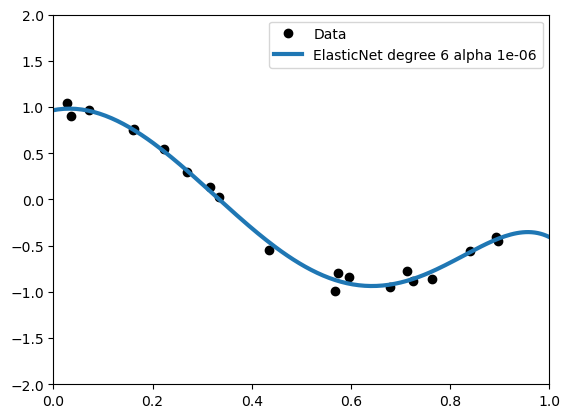

In [36]:
elasticNet_model = make_pipeline(PolynomialFeatures(degree=20), ElasticNet(max_iter=10000000))

param_grid = {
    'polynomialfeatures__degree': [2, 3, 4, 5, 6, 7, 8], 
    'elasticnet__alpha': [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]

}

grid_search = GridSearchCV(elasticNet_model, param_grid, cv=5)
grid_search.fit(x, y)

best_degree = grid_search.best_params_['polynomialfeatures__degree']
best_alpha = grid_search.best_params_['elasticnet__alpha']

print(f"Optimal Degree: {best_degree}")
print(f"Optimal Alpha: {best_alpha}")

best_model = make_pipeline(PolynomialFeatures(degree=best_degree), ElasticNet(alpha=best_alpha, max_iter=1000000))
best_model.fit(x, y)
best_predict = best_model.predict(x_plot)

plt.plot(x, y, 'ok', label="Data")
plt.plot(x_plot, best_predict, linewidth=3, label=f"ElasticNet degree {best_degree} alpha {best_alpha}")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend()
plt.show()

# Zadanie 3 
Dobierz optymalny stopień wielomianu oraz parametr <tt>alpha</tt> za pomocą metody <tt>GridSearchCV</tt> dla danych reklamowych, obejmującym sprzedaż produktów i ich budżet reklamowy w trzech różnych mediach telewizyjnych, radiu, gazetach.

*  policz r_square score.

In [35]:

from sklearn.metrics import r2_score

r2 = r2_score(y, best_model.predict(x))
print(f"R^2 Score: {r2}")

plt.plot(x, y, 'ok', label="Data")
plt.plot(x_plot, best_predict, linewidth=3, label=f"Lasso degree {best_degree} alpha {best_alpha}")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend()
plt.show()

URLError: <urlopen error [Errno 8] nodename nor servname provided, or not known>